# Test Case with HSPICE-1 Model


## Tool setup

In [1]:
# install conda
import os
CONDA_PREFIX = os.environ.get('CONDA_PREFIX', None)
if not CONDA_PREFIX:
  !python -m pip install condacolab
  import condacolab
  condacolab.install()

# install ngspice
!conda install -c conda-forge ngspice

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:12
🔁 Restarting kernel...
Channels:
 - conda-forge
Platform: linux-64
Solving environment: \ | / - done


==> WARNING: A newer version of conda exists. <==
    current version: 23.11.0
    latest version: 24.5.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - ngspice


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.6.2   |       hbcca054_0         152 KB  conda-forge
    certifi-2024.2.2           |     pyhd8ed1ab_0         157 KB  conda-forge
    gettext-0.22.5             |       h59595ed_2         464 KB  conda-forge
    gettext-

## Model HSPICE-1

In [173]:
%%writefile /content/models.spice
* NMOS Transistor Model
* NMOS Transistor Model
.model NMOS_Model NMOS (LEVEL=1             ; Level 1 model
    + TOX=20n           ; Oxide thickness
    + LD=0.2u           ; Lateral diffusion
    + VTO=0.7           ; Threshold voltage
    + LAMBDA=0.03       ; Channel length modulation
    + UO=600            ; Low-field electron mobility (cm2/Vs)
    + GAMMA=0.298       ; Body effect factor (V^0.5)
    + PHI=0.688         ; Surface inversion potential
    + RS=40             ; Diffusion sheet resistance (/2)
    + CJ=271e-6         ; Zero-bias bulk junction capacitance (F/m2)
    + CJSW=600e-6       ; Zero-bias sidewall bulk junction capacitance (F/m)
    + MJ=0.5            ; Bulk junction grading coefficient
    + PB=0.904          ; Bulk junction contact potential
    + CGDO=346e-12       ; Gate-drain overlap capacitance (F/m)
    + CGSO=346e-12       ; Gate-source overlap capacitance (F/m)
    + KF=4e-24          ; Flicker noise coefficient (V2F)
)


* PMOS Transistor Model
* PMOS Transistor Model
.model PMOS_Model PMOS (LEVEL=1             ; Level 1 model
    + TOX=20n           ; Oxide thickness
    + LD=0.2u           ; Lateral diffusion
    + VTO=0.9           ; Threshold voltage
    + LAMBDA=0.06       ; Channel length modulation
    + UO=200            ; Low-field electron mobility (cm2/Vs)
    + GAMMA=0.471       ; Body effect factor (V^0.5)
    + PHI=0.730         ; Surface inversion potential
    + RS=60             ; Diffusion sheet resistance (/2)
    + CJ=423e-6         ; Zero-bias bulk junction capacitance (F/m2)
    + CJSW=1.2e-9       ; Zero-bias sidewall bulk junction capacitance (F/m)
    + MJ=0.5            ; Bulk junction grading coefficient
    + PB=0.928          ; Bulk junction contact potential
    + CGDO=346e-9       ; Gate-drain overlap capacitance (F/m)
    + CGSO=346e-9       ; Gate-source overlap capacitance (F/m)
    + KF=2e-24          ; Flicker noise coefficient (V2F)
)




Overwriting /content/models.spice


In [149]:
%%writefile /content/models.spice
* NMOS Transistor Model
* NMOS Transistor Model
.model NMOS_Model NMOS (LEVEL=1             ; Level 1 model
    + TOX=20n           ; Oxide thickness
    + LD=0.2u           ; Lateral diffusion
    + VTO=0.7           ; Threshold voltage
    + LAMBDA=0.03
    + UO=600            ; Low-field electron mobility (cm2/Vs)
    + GAMMA=0.298       ; Body effect factor (V^0.5)
    + PHI=0.688         ; Surface inversion potential
    + RS=40             ; Diffusion sheet resistance (/2)
    + CJ=271e-6         ; Zero-bias bulk junction capacitance (F/m2)
    + CJSW=600e-6       ; Zero-bias sidewall bulk junction capacitance (F/m)
    + MJ=0.5            ; Bulk junction grading coefficient
    + PB=0.904          ; Bulk junction contact potential
    + CGDO=346e-6       ; Gate-drain overlap capacitance (F/m)
)


* PMOS Transistor Model
* PMOS Transistor Model
.model PMOS_Model PMOS (LEVEL=1             ; Level 1 model
    + TOX=20n           ; Oxide thickness
    + LD=0.2u           ; Lateral diffusion
    + VTO=0.9           ; Threshold voltage
    + LAMBDA=0.06
     + UO=200            ; Low-field electron mobility (cm2/Vs)
    + GAMMA=0.471       ; Body effect factor (V^0.5)
    + PHI=0.730         ; Surface inversion potential
    + RS=60             ; Diffusion sheet resistance (/2)
    + CJ=423e-6         ; Zero-bias bulk junction capacitance (F/m2)
    + CJSW=1.2e-9       ; Zero-bias sidewall bulk junction capacitance (F/m)
    + MJ=0.5            ; Bulk junction grading coefficient
    + PB=0.928          ; Bulk junction contact potential
    + CGDO=346e-6       ; Gate-drain overlap capacitance (F/m)
)




Overwriting /content/models.spice


##Inverter with DC Sweep

In [183]:
%%writefile Inverter_DC.spice
* Inverter DC sim
.include '/content/models.spice'

v1 vdd 0 5
v2 vi 0  1
**v2 vi 0 PULSE (0 5 0 10n 10n 20n 40n)

m1 vo vi 0 0 NMOS_Model w=10u l=1u
m2 vo vi vdd vdd PMOS_Model w=20u l=1u

*rd vdd vo 5k

*.model my_nmos nmos level=1 vto=0.5 50u
.option brief
.op
.end

.control

set wr_singlescale
set wr_vecnames

save all
dc v2 0 5 0.01
*tran 10n 100n 10n
display
wrdata output_dc_inv.txt v(vo) v(vi)
.endc

Overwriting Inverter_DC.spice


In [184]:
!ngspice -b Inverter_DC.spice


Note: Compatibility modes selected: hs a

    in netlist or included files, will be replaced with '*'.
    Check line no 4:  )


Circuit: * inverter dc sim

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 501
Here are the vectors currently active:

Title: * inverter dc sim
Name: dc1 (DC transfer characteristic)
Date: Wed Jun  5 03:11:41  2024

    v-sweep             : voltage, real, 501 long [default scale]
    v1#branch           : current, real, 501 long
    v2#branch           : current, real, 501 long
    vdd                 : voltage, real, 501 long
    vi                  : voltage, real, 501 long
    vo                  : voltage, real, 501 long
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 1
	Node                                  Voltage
	----                                  -------
	----	-------
	vo                               4.979354e+00
	vi                               1.000000e+00
	vdd                       

In [185]:
df4 = pd.read_csv("output_dc_inv.txt", sep='\s+')
df4

,v-sweep,v(vo),v(vi)
0,0.00,5.000000,0.00
1,0.01,5.000000,0.01
2,0.02,5.000000,0.02
3,0.03,5.000000,0.03
4,0.04,5.000000,0.04
...,...,...,...
496,4.96,0.105799,4.96
497,4.97,0.103460,4.97
498,4.98,0.101149,4.98
499,4.99,0.098868,4.99


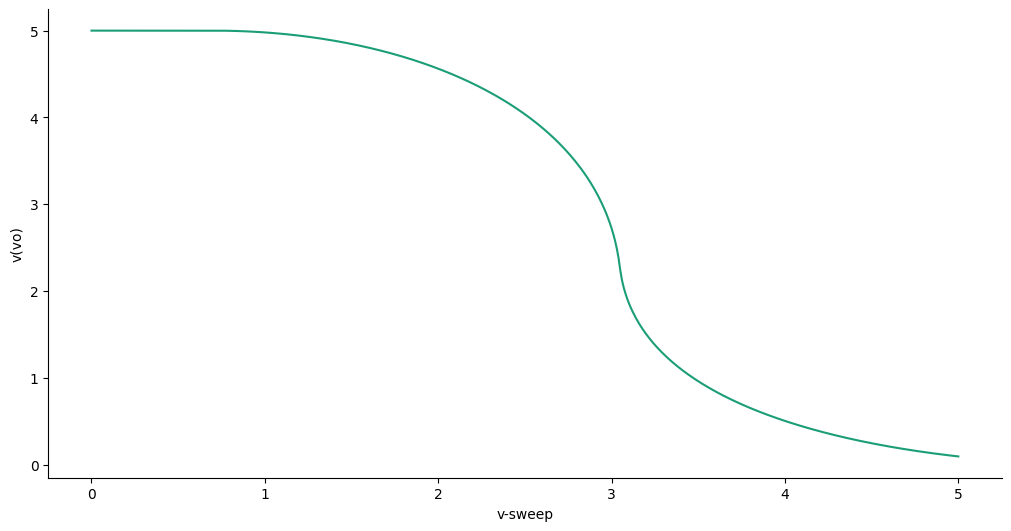

In [186]:
# Vin vs Vout

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['v-sweep']
  ys = series['v(vo)']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df4.sort_values('v-sweep', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('v-sweep')
_ = plt.ylabel('v(vo)')

## Inverter Transient Simulation



In [174]:
%%writefile netlist.spice
* Common-source amplifier
.include '/content/models.spice'

v1 vdd 0 5
*v2 vi 0  1
**v2 vi 0 PULSE (5 0 10n 10n 10n 500n 1u)
Vin vi 0 dc 0 pulse (0 5 95n 2n 2n 90n 180n)

m1 vo vi 0 0 NMOS_Model w=10u l=1u
m2 vo vi vdd vdd PMOS_Model w=10u l=1u

**Cload vo 0 10p

*.model my_nmos nmos level=1 vto=0.5 50u
.option brief nomod
.op
.end

.control

set wr_singlescale
set wr_vecnames

save all
*dc v2 0 5 0.01
tran 0.1n 500n 10n
display
wrdata output.txt v(vo) v(vi)
.endc


Overwriting netlist.spice


In [175]:
%%writefile .spiceinit
set ngbehavior=hsa
set ng_nomodcheck

Overwriting .spiceinit


In [176]:
!ngspice -b netlist.spice


Note: Compatibility modes selected: hs a

    in netlist or included files, will be replaced with '*'.
    Check line no 4:  )


Circuit: * common-source amplifier

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
vdd                                          5
vi                                           0
vo                                           5
vin#branch                                   0
v1#branch                         -5.00998e-12


No. of Data Rows : 4931
Here are the vectors currently active:

Title: * common-source amplifier
Name: tran1 (Transient Analysis)
Date: Wed Jun  5 03:10:39  2024

    time                : time, real, 4931 long [default scale]
    v1#branch           : current, real, 4931 long
    vdd                 : voltage, real, 4931 long
    vi                  : voltage, real, 4931 long
    vin#br

In [177]:
df1 = pd.read_csv("output.txt", sep='\s+')
df1

,time,v(vo),v(vi)
0,1.002800e-08,5.000000,0.0
1,1.012800e-08,5.000000,0.0
2,1.022800e-08,5.000000,0.0
3,1.032800e-08,5.000000,0.0
4,1.042800e-08,5.000000,0.0
...,...,...,...
4926,4.996500e-07,0.050478,5.0
4927,4.997500e-07,0.050478,5.0
4928,4.998500e-07,0.050478,5.0
4929,4.999500e-07,0.050478,5.0


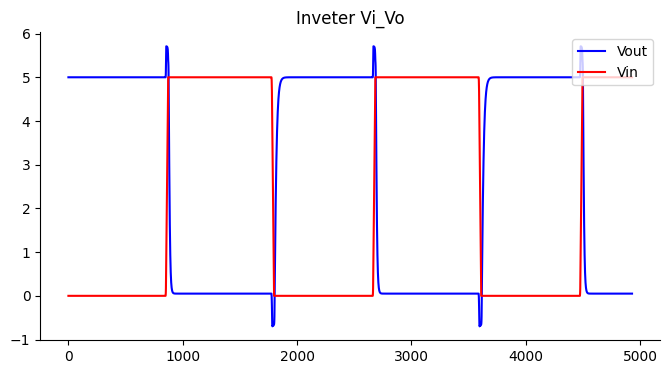

In [178]:
# Vout and Vin

from matplotlib import pyplot as plt
df1['v(vo)'].plot(kind='line', figsize=(8, 4), color='blue', label='Vout', title='Inveter Vi_Vo')
df1['v(vi)'].plot(kind='line', figsize=(8, 4), color='red', label='Vin', title='Inveter Vi_Vo')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.legend(loc="upper right")


##CS Amplifier with resistor Load


In [187]:
%%writefile cs_amp.spice
* Common-source amplifier
.include '/content/models.spice'

v1 vdd 0 5
v2 vi 0  1
**v2 vi 0 PULSE (0 5 0 10n 10n 20n 40n)

m1 vo vi 0 0 NMOS_Model w=10u l=1u
*m2 vo vi vdd vdd PMOS_Model w=20u l=1u

rd vdd vo 5k

*.model my_nmos nmos level=1 vto=0.5 50u
.option brief
.op
.end

.control

set wr_singlescale
set wr_vecnames

save all
dc v2 0 5 0.01
*tran 10n 100n 10n
display
wrdata output_cs.txt v(vo) v(vi)
.endc

Overwriting cs_amp.spice


In [188]:
!ngspice -b cs_amp.spice


Note: Compatibility modes selected: hs a

    in netlist or included files, will be replaced with '*'.
    Check line no 4:  )


Circuit: * common-source amplifier

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 501
Here are the vectors currently active:

Title: * common-source amplifier
Name: dc1 (DC transfer characteristic)
Date: Wed Jun  5 03:11:57  2024

    v-sweep             : voltage, real, 501 long [default scale]
    v1#branch           : current, real, 501 long
    v2#branch           : current, real, 501 long
    vdd                 : voltage, real, 501 long
    vi                  : voltage, real, 501 long
    vo                  : voltage, real, 501 long
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 1
	Node                                  Voltage
	----                                  -------
	----	-------
	vo                               4.570161e+00
	vi                               1.000000e+00
	vdd       

In [189]:
df2 = pd.read_csv("output_cs.txt", sep='\s+')
df2

,v-sweep,v(vo),v(vi)
0,0.00,5.000000,0.00
1,0.01,5.000000,0.01
2,0.02,5.000000,0.02
3,0.03,5.000000,0.03
4,0.04,5.000000,0.04
...,...,...,...
496,4.96,0.172896,4.96
497,4.97,0.172581,4.97
498,4.98,0.172267,4.98
499,4.99,0.171955,4.99


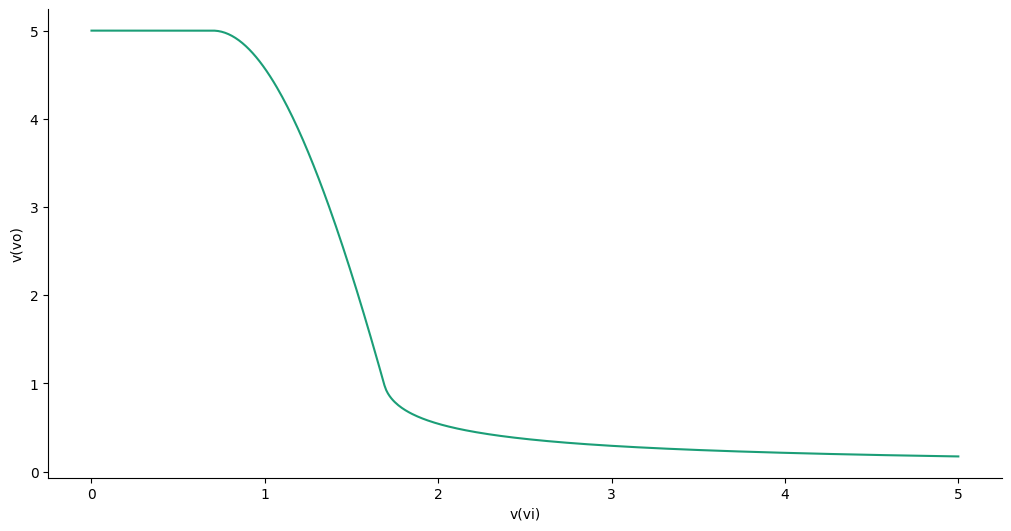

In [190]:
# Vo vs Vi

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['v(vi)']
  ys = series['v(vo)']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df2.sort_values('v(vi)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('v(vi)')
_ = plt.ylabel('v(vo)')